In [1]:
import os
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import utils

data_path = '../data/non_gaussian.csv'
log_path = '../results_1b/'

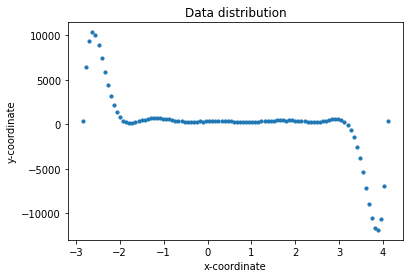

In [2]:
# Data Visualisation
f = open(data_path, 'r')
input_x, target = [], []
for line in f.readlines():
    nums = line.strip().split(',')
    input_x.append(float(nums[0]))
    target.append(float(nums[1]))
f.close()
plt.scatter(input_x, target, s=10)
plt.title('Data distribution')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

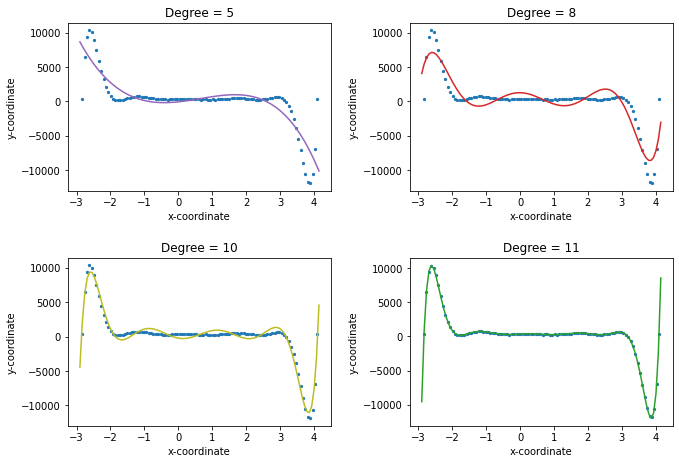

In [3]:
# Plots of Polynomials of different degree
deg_wts_file = 'polynomial_deg_wts.txt'
f = open(os.path.join(log_path, deg_wts_file), 'r')
x, y = np.linspace(-2.9, 4.15, 100), []

for line in f.readlines():
    tokens = line.strip().split()
    y_out = utils.get_output_from_weights(x, tokens[3])
    y.append(y_out)
f.close()

fig, axs = plt.subplots(2, 2)
deg_list = [5, 8, 10, 11]
colors = ['tab:purple', 'tab:red', 'tab:olive', 'tab:green']
    
for (ax, deg, col) in zip(axs.flat, deg_list, colors):
    ax.plot(x, y[deg],col)
    ax.scatter(input_x, target, s=5)
    ax.set(xlabel='x-coordinate', ylabel='y-coordinate')
    ax.set_title(f'Degree = {deg}')

plt.subplots_adjust(left=0, bottom=0, right=1.4, top=1.4, wspace=0.3, hspace=0.4)
plt.show()

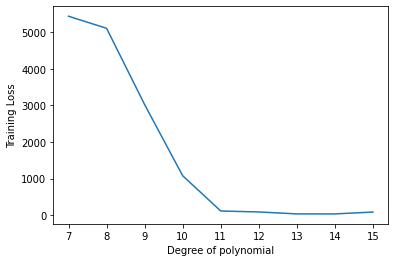

In [4]:
# Plot of Loss v/s Degree of polynomial
deg_loss_file = 'polynomial_deg_loss.txt'
f = open(os.path.join(log_path, deg_loss_file), 'r')

train_loss, deg = [], []

for line in f.readlines()[7:]:
    tokens = line.strip().split()
    train_loss.append(float(tokens[4]))
    deg.append(int(tokens[1][:-1]))
f.close()

plt.plot(deg, train_loss)
plt.ylabel('Training Loss')
plt.xlabel('Degree of polynomial')
plt.show()

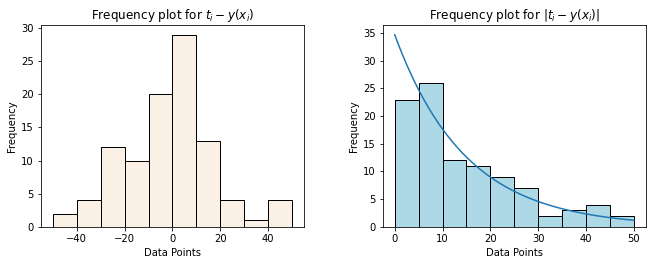

In [5]:
# Plot for the distribution of noise
noise_file = 'noise.txt'
f = open(os.path.join(log_path, noise_file), 'r')

noise = []

for line in f.readlines():
    noise.append(float(line))

fig, axs = plt.subplots(1,2)
axs = axs.ravel()

axs[0].hist(noise, bins=np.linspace(-50,50,11), color='linen', ec='black')
axs[0].set(xlabel='Data Points', ylabel='Frequency')
axs[0].set_title(f'Frequency plot for $t_i-y(x_i)$')

noise = np.abs(noise)
axs[1].hist(noise, bins=np.linspace(0,50,11), color='lightblue', ec="black")
axs[1].set(xlabel='Data Points', ylabel='Frequency')
axs[1].set_title(f'Frequency plot for $|t_i-y(x_i)|$')
x = np.linspace(0,50,100)
mu = 1/noise.mean()
f = 34.7*np.exp(-mu*x)
axs[1].plot(x,f, color='tab:blue')
plt.subplots_adjust(left=0, bottom=0, right=1.4, top=0.7, wspace=0.3, hspace=0.4)
plt.show()